In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial, log
import time

# Exerxise 2

Trond Hauklien
TKJ4215 Statistical Thermodynamics in Chemistry and Biology

Date: 07.02.2023

Task 1

1 0.0
10 0.0
100 0.0
1000 0.0
10000 0.0023162364959716797
100000 0.12365245819091797
1000000 6.684540033340454


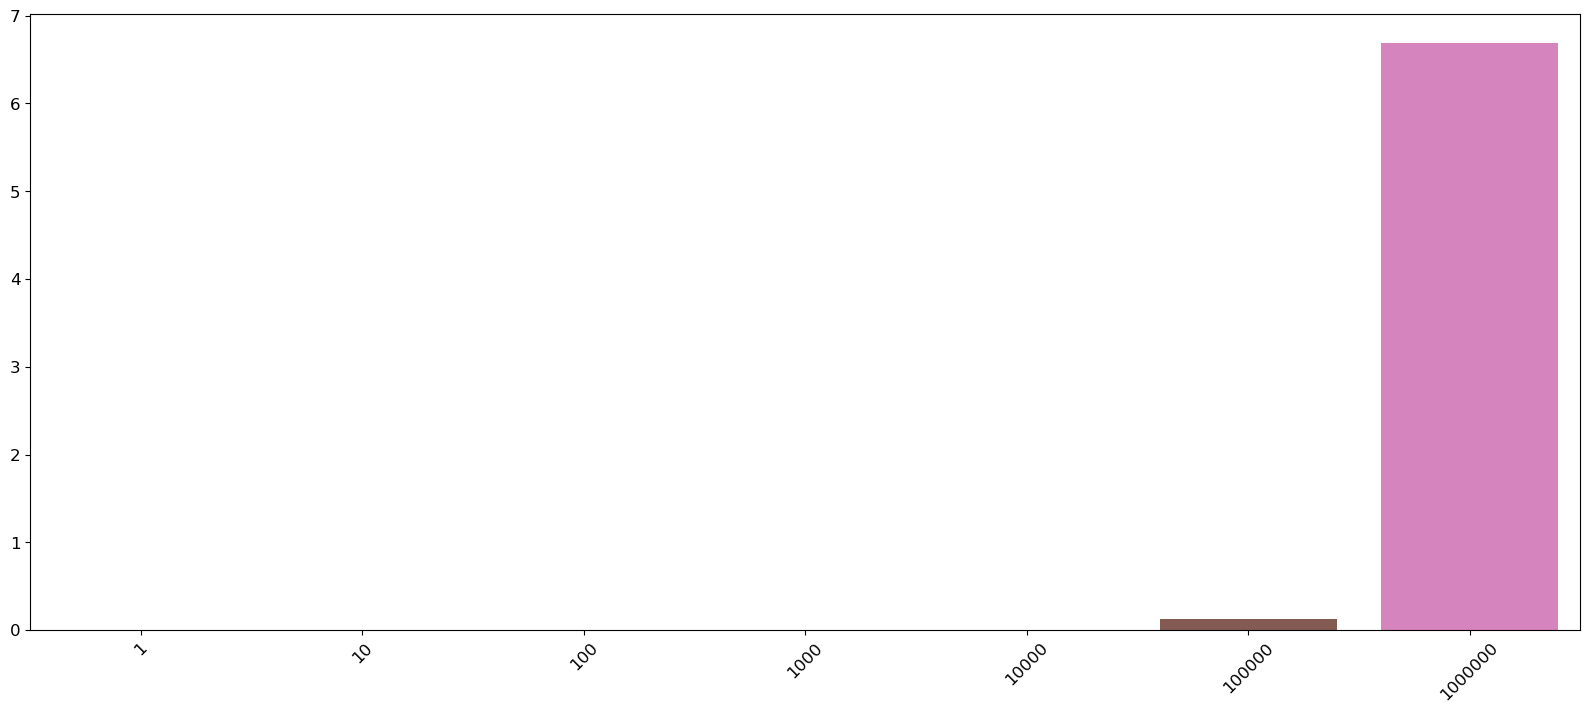

In [2]:
timings = []
ns = []
n = 1
ex_time = 0
while ex_time < 1:
    start = time.time()
    f = factorial(n)
    end = time.time()
    ex_time = end - start
    timings.append(ex_time)
    ns.append(n)
    print(n, ex_time)
    n *= 10

plt.figure(figsize=(20,8))
sns.barplot(x=ns, y=timings)
plt.yticks(size = 12)
plt.xticks(rotation=45, size = 12)
plt.show()

We see that the execution time increases drastically when we get to an order of magnitude of $10^6$. Comparing this to 1 mole ($\sim 10^{23}$) of atoms (which would be similar to a real life sized system), we see that it would be really expensive to compute the multiplicity.

### Task 2

In [3]:
def stirling(n):
    """
    Returns ln n! using Stirling's approximation
    """
    return n * log(n) - n

def exact_sol(n):
    """
    Returns ln n! exactly
    """
    return log(factorial(n))

n = [10**i for i in range(1,6)] 
print('{:>12} {:>16} {:>18} {:>18} {:>18}'.format('n', 'Exact', 'Stirling', 'Absolute error', 'Relative error') + '\n')
for i in n:
    ex = exact_sol(i)
    st = stirling(i)
    print('{:12d} {:16.4f} {:18.4f} {:18.4f} {:18.4f}'.format(i, ex, st, ex-st, 1-st/ex) + '\n') 


           n            Exact           Stirling     Absolute error     Relative error

          10          15.1044            13.0259             2.0786             0.1376

         100         363.7394           360.5170             3.2224             0.0089

        1000        5912.1282          5907.7553             4.3729             0.0007

       10000       82108.9278         82103.4037             5.5241             0.0001

      100000     1051299.2219       1051292.5465             6.6754             0.0000



Stirlings approximation is useful in statistical thermodynamics because we are dealing with multiplicity for systems where the particle count is big and the factorial might be impossible to compute.

### Task 3

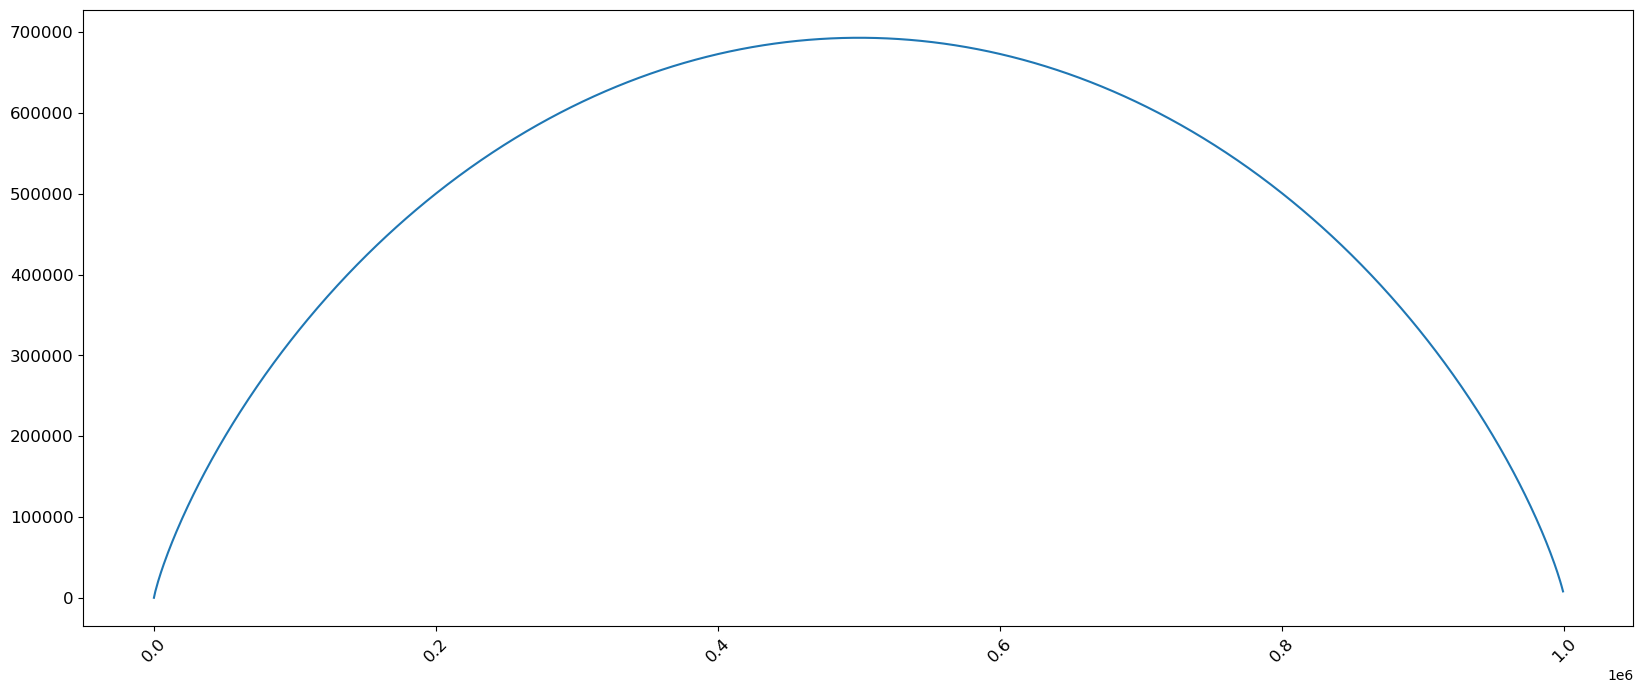

In [4]:
lattice_points = 1e6 
particles = np.arange(1,lattice_points, 1000) 
multiplicities_ln = [stirling(lattice_points) - stirling(n) - stirling(lattice_points-n) for n in particles] 

# plot ln W vs particles for a given number of lattice points
plt.figure(figsize=(20,8))
sns.lineplot(x=particles, y=multiplicities_ln)
plt.yticks(size = 12)
plt.xticks(rotation=45, size = 12)
plt.show()


We see that for a $N$ size lattice grid the multiplicity will be maximized around $n=N/2$. 